In [ ]:
# creating TPU environment to create model architecture and initialize architecture's variable on TPU
import os
import tensorflow as tf

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
# create a distribution stratagy
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.5.221.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.5.221.42:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NMT/dataset.csv', encoding='utf-8')

In [ ]:
data.head(10)

,english_sentence,hindi_sentence
0,dwarka is also a dhaam among the chaar dhaams,द्वारका चार धामों में एक धाम भी है
1,lord krishna had specially settled this amidst...,भगवान कृष्ण ने इसे समुद्र के बीच में विशेष रूप...
2,situated on the western railway s surendranaga...,पश्चिम रेलवे की सुरेंद्रनगरओखा पोर्ट लाइन पर स...
3,this holy city is mathura the avatar land of l...,यमुना तट पर भगवान श्रीकृष्ण की अवतार भूमि का य...
4,mathura station is on the northeastern railway...,पूर्वोत्तर रेलवे की आगरा फोर्ट से गोरखपुर जाने...
5,garhmukteshwar is a sacred pilgrimage of the h...,गढ़मुक्तेश्वर हिंदुओं का पावन तीर्थ है
6,let us go to the ganges fair of garh mukteshwar,चलें गढ़ मुक्तेश्वर का गंगा मेला
7,the history of north india s famous and ancien...,गाजियाबाद जिले के गढ़ मुक्तेश्वर में पतित पावन...
8,there is full fervor of the fair this time als...,इस बार भी गढ़ मुक्तेश्वर में मेले की भरपूर गहम...
9,the holy dip is on november,मुख्य स्नान नवंबर को है


In [ ]:
data.describe()

,english_sentence,hindi_sentence
count,230131,230132
unique,224899,224816
top,there is difficulty in breathing,वण्डिप्पेरियार प्रकृति समृद्ध प्रदेश है
freq,7,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230132 entries, 0 to 230131
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   english_sentence  230131 non-null  object
 1   hindi_sentence    230132 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [ ]:
data.isnull().sum()

english_sentence    1
hindi_sentence      0
dtype: int64

In [ ]:
data[data['english_sentence'].isnull()], data[data['hindi_sentence'].isnull()]

(       english_sentence hindi_sentence
 129276              NaN      लागू नहीं, Empty DataFrame
 Columns: [english_sentence, hindi_sentence]
 Index: [])

In [ ]:
data = data.dropna()
data.isnull().sum()

english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
data = data.drop_duplicates(subset='english_sentence')
data = data.drop_duplicates(subset='hindi_sentence')

In [ ]:
data.describe()

,english_sentence,hindi_sentence
count,224640,224640
unique,224640,224640
top,He asserted that today's India is a New India ...,रेलवे बोर्ड ने निर्णय किया कि पहले से स्वीकृत ...
freq,1,1


In [ ]:
#data = data.iloc[:100000]

In [ ]:
data.english_sentence = data.english_sentence.apply(lambda x : x.lower())

In [ ]:
import re
data.english_sentence = data.english_sentence.apply(lambda x: re.sub("'", '', x))
data.english_sentence = data.english_sentence.apply(lambda x: re.sub('"', '', x))
data.hindi_sentence = data.hindi_sentence.apply(lambda x: re.sub("'", '', x))
data.hindi_sentence = data.hindi_sentence.apply(lambda x: re.sub('"', '', x))

In [ ]:
import string
special_characters = set(string.punctuation)
data.english_sentence = data.english_sentence.apply(lambda x: ''.join(char for char in x if char not in special_characters))
data.hindi_sentence = data.hindi_sentence.apply(lambda x: ''.join(char for char in x if char not in special_characters))

In [ ]:
num_digits= str.maketrans('','', string.digits)
data.english_sentence = data.english_sentence.apply(lambda x: x.translate(num_digits))
data.hindi_sentence = data.hindi_sentence.apply(lambda x: x.translate(str.maketrans('', '', string.ascii_letters + string.digits + string.punctuation + '०१२३४५६७८९')))

In [ ]:
data.english_sentence = data.english_sentence.apply(lambda x: x.strip())
data.hindi_sentence = data.hindi_sentence.apply(lambda x: x.strip())

In [ ]:
data = data[(data.hindi_sentence.apply(lambda x : 0<len(x.split())<=15)) & (data.english_sentence.apply(lambda x : 0<len(x.split())<=15))]

In [ ]:
data['hindi_sentence_util'] = data.hindi_sentence
data.hindi_sentence = data.hindi_sentence.apply(lambda x : 'START ' + x + ' END')


In [ ]:
data = data.drop_duplicates(subset='english_sentence')
data = data.drop_duplicates(subset='hindi_sentence')
data = data.drop_duplicates(subset='hindi_sentence_util')

In [ ]:
data.describe()

,english_sentence,hindi_sentence,hindi_sentence_util
count,69201,69201,69201
unique,69201,69201,69201
top,niti aayog to release the second edition of he...,START यूरिक एसिड के क्रिस्टल सुइयों की भाँति त...,माँ का दूध बच्चे को रोगों से बचाता है
freq,1,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69201 entries, 0 to 230130
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   english_sentence     69201 non-null  object
 1   hindi_sentence       69201 non-null  object
 2   hindi_sentence_util  69201 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB


In [ ]:
data.isnull().sum()

english_sentence       0
hindi_sentence         0
hindi_sentence_util    0
dtype: int64

In [ ]:
data

,english_sentence,hindi_sentence,hindi_sentence_util
0,dwarka is also a dhaam among the chaar dhaams,START द्वारका चार धामों में एक धाम भी है END,द्वारका चार धामों में एक धाम भी है
1,lord krishna had specially settled this amidst...,START भगवान कृष्ण ने इसे समुद्र के बीच में विश...,भगवान कृष्ण ने इसे समुद्र के बीच में विशेष रूप...
2,situated on the western railway s surendranaga...,START पश्चिम रेलवे की सुरेंद्रनगरओखा पोर्ट लाइ...,पश्चिम रेलवे की सुरेंद्रनगरओखा पोर्ट लाइन पर स...
5,garhmukteshwar is a sacred pilgrimage of the h...,START गढ़मुक्तेश्वर हिंदुओं का पावन तीर्थ है END,गढ़मुक्तेश्वर हिंदुओं का पावन तीर्थ है
6,let us go to the ganges fair of garh mukteshwar,START चलें गढ़ मुक्तेश्वर का गंगा मेला END,चलें गढ़ मुक्तेश्वर का गंगा मेला
...,...,...,...
230109,satyaprakash upadhyay,START सत्यप्रकाश उपाध्याय END,सत्यप्रकाश उपाध्याय
230111,hes in jail he has revealed some astonishing f...,START अभी जेल में बंद है उसने एक चौकाने वाला ख...,अभी जेल में बंद है उसने एक चौकाने वाला खुलासा ...
230117,one country one election,START एक देश एक चुनाव END,एक देश एक चुनाव
230128,web wonder women is the third leg of the women...,START वेब वंडर वुमेन मंत्रालय का महिला अचीवरों...,वेब वंडर वुमेन मंत्रालय का महिला अचीवरों का ती...


In [ ]:
eng_word_vocab = set()
eng_sent_len = []
for sent in data.english_sentence:
    eng_sent_len.append(len(sent.split()))
    for word in sent.split():
        if word not in eng_word_vocab:
            eng_word_vocab.add(word)
hin_word_vocab = set()
hin_sent_len = []
for sent in data.hindi_sentence:
    hin_sent_len.append(len(sent.split()))
    for word in sent.split():
        if word not in hin_word_vocab:
            hin_word_vocab.add(word)
eng_word_vocab = sorted(eng_word_vocab)
hin_word_vocab = sorted(hin_word_vocab)
print('max sent len in eng : ', max(eng_sent_len))
print('max sent len in hin : ', max(hin_sent_len))

max sent len in eng :  15
max sent len in hin :  17


In [ ]:
len(eng_word_vocab), len(hin_word_vocab)

(33894, 40096)

In [ ]:
hin_word_vocab[3100]

'आशाएंआकांक्षाएं'

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer_eng = Tokenizer()
tokenizer_hin = Tokenizer()
tokenizer_eng.fit_on_texts(eng_word_vocab)
tokenizer_hin.fit_on_texts(hin_word_vocab)
sequence_eng = tokenizer_eng.texts_to_sequences(data.english_sentence)
sequence_hin = tokenizer_hin.texts_to_sequences(data.hindi_sentence_util)


In [ ]:
len(tokenizer_eng.word_index), len(tokenizer_hin.word_index)

(33894, 40096)

In [74]:
tokenizer_hin.word_index['start']

2

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
padded_eng = pad_sequences(sequence_eng, padding='post', maxlen=max(eng_sent_len))
padded_hin = pad_sequences(sequence_hin, padding='post', maxlen=max(hin_sent_len)-2)

In [ ]:
padded_hin, padded_hin.shape

(array([[18093, 12108, 18263, ...,     0,     0,     0],
        [26244,  8764, 19599, ..., 16876,     0,     0],
        [20702, 31082,  8454, ...,  7833, 38419, 39729],
        ...,
        [ 5078, 17942,  5078, ...,     0,     0,     0],
        [33609, 32290, 33492, ...,     0,     0,     0],
        [13615, 32686, 38758, ...,     0,     0,     0]], dtype=int32),
 (69201, 15))

In [ ]:
import numpy as np
val_start = np.zeros((padded_hin.shape[0], 1), dtype=padded_hin.dtype)
val_start[:,:] = 2
val_end = np.zeros((padded_hin.shape[0], 1), dtype=padded_hin.dtype)
val_end[:,:] = 1

padded_hin_in = np.hstack((val_start, padded_hin)).astype(np.int32)
padded_hin_out = np.hstack((padded_hin, val_end)).astype(np.int32)


In [ ]:
padded_hin_in, padded_hin_out, padded_hin_in.shape

(array([[    2, 18093, 12108, ...,     0,     0,     0],
        [    2, 26244,  8764, ..., 16876,     0,     0],
        [    2, 20702, 31082, ...,  7833, 38419, 39729],
        ...,
        [    2,  5078, 17942, ...,     0,     0,     0],
        [    2, 33609, 32290, ...,     0,     0,     0],
        [    2, 13615, 32686, ...,     0,     0,     0]], dtype=int32),
 array([[18093, 12108, 18263, ...,     0,     0,     1],
        [26244,  8764, 19599, ...,     0,     0,     1],
        [20702, 31082,  8454, ..., 38419, 39729,     1],
        ...,
        [ 5078, 17942,  5078, ...,     0,     0,     1],
        [33609, 32290, 33492, ...,     0,     0,     1],
        [13615, 32686, 38758, ...,     0,     0,     1]], dtype=int32),
 (69201, 16))

In [ ]:
#checking for any nan values
np.isnan(np.min(padded_eng)), np.isnan(np.min(padded_hin_in)), np.isnan(np.min(padded_hin_out))

(False, False, False)

In [ ]:
np.where(np.isnan(padded_hin_out))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#padded_eng[75522:,:],padded_hin_in[75522:,:],padded_hin_out[75522:,:]

In [ ]:
test_eng = np.zeros_like(padded_eng)
test_hin_in = np.zeros_like(padded_hin_in)
test_hin_out = np.zeros_like(padded_hin_out)

# MODEL CREATION

In [ ]:
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model


In [ ]:
def create_model():
  # encoder
  input_eng = Input(shape=(None,), name='eng_inp_tensor')
  encoder_emb = Embedding(input_dim=len(tokenizer_eng.word_index)+1, output_dim=128, embeddings_initializer='random_normal')(input_eng)
  enc_outputs, enc_state_h, enc_state_c = LSTM(64, return_state=True, kernel_initializer='random_normal')(encoder_emb) #output, hidden states of only last LSTM nodes are returned

  #decoder
  input_hin = Input(shape=(None,), name='hin_inp_tensor')
  decoder_emb = Embedding(input_dim = len(tokenizer_hin.word_index)+1, output_dim=128, embeddings_initializer='random_normal')(input_hin)
  dec_output, dec_state_h, dec_state_c = LSTM(64,return_sequences=True, return_state=True, kernel_initializer='random_normal')(decoder_emb, initial_state=[enc_state_h, enc_state_c]) #initial_state links decoder to encoder and output of all the LSTM nodes are returned, , hidden states of only last LSTM node is returned
  dec_outputs = Dense(len(tokenizer_hin.word_index), activation='softmax', kernel_initializer='random_normal')(dec_output)
  #Model
  model = Model([input_eng, input_hin], dec_outputs)
  return model

In [ ]:
#model.summary()

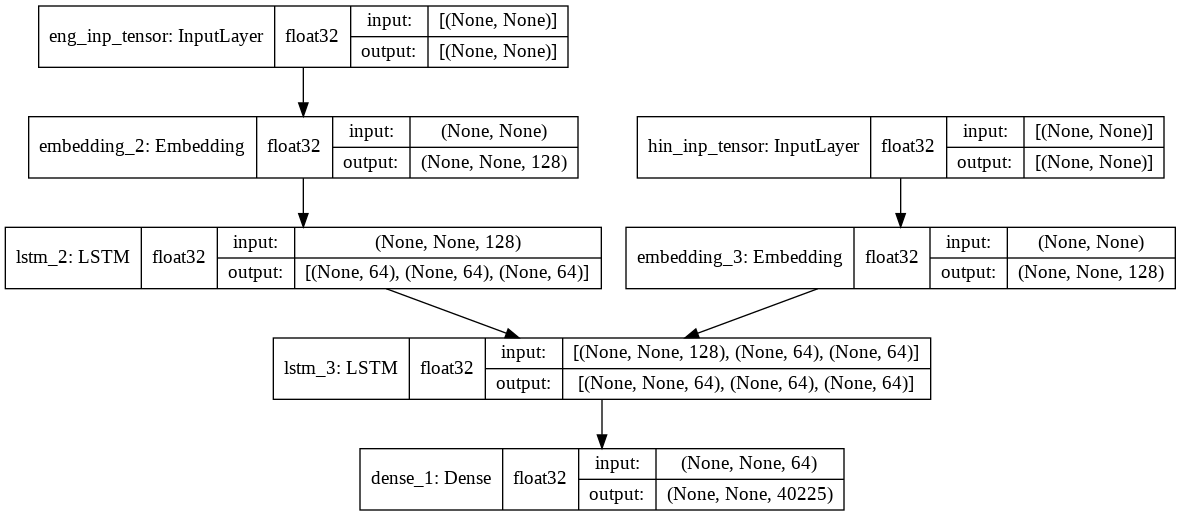

In [75]:
# plotting the model
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
# from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True,)

# Training

In [ ]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [ ]:
# creating model inside TPU
with strategy.scope():
  # model = create_model()
  # loss = tf.keras.losses.SparseCategoricalCrossentropy()
  # opt = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1)
  # model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

  #load model if already trained
  model = load_model('/content/drive/MyDrive/Colab Notebooks/NMT/nmt.h5') #no need to use compile as it is already compiled, if we want to change opt and loss then we can use compile and it will not affect pretrained weight.
  # loss = tf.keras.losses.SparseCategoricalCrossentropy()
  # opt = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.59, beta_2=0.8999, clipnorm=0.85)
  # model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(x=[padded_eng, padded_hin_in],
          y=padded_hin_out,
          batch_size=64,
          epochs=5,
          validation_split=0.3)

Epoch 1/5
757/757 [==============================] - 36s 37ms/step - loss: 2.3399 - accuracy: 0.6023 - val_loss: 6.0322 - val_accuracy: 0.4755
Epoch 2/5
757/757 [==============================] - 20s 27ms/step - loss: 2.3408 - accuracy: 0.6022 - val_loss: 6.0988 - val_accuracy: 0.4757
Epoch 3/5
757/757 [==============================] - 20s 27ms/step - loss: 2.3386 - accuracy: 0.6026 - val_loss: 6.1055 - val_accuracy: 0.4763
Epoch 4/5
757/757 [==============================] - 20s 27ms/step - loss: 2.3401 - accuracy: 0.6023 - val_loss: 6.0986 - val_accuracy: 0.4704
Epoch 5/5
757/757 [==============================] - 20s 27ms/step - loss: 2.3371 - accuracy: 0.6029 - val_loss: 6.1644 - val_accuracy: 0.4768


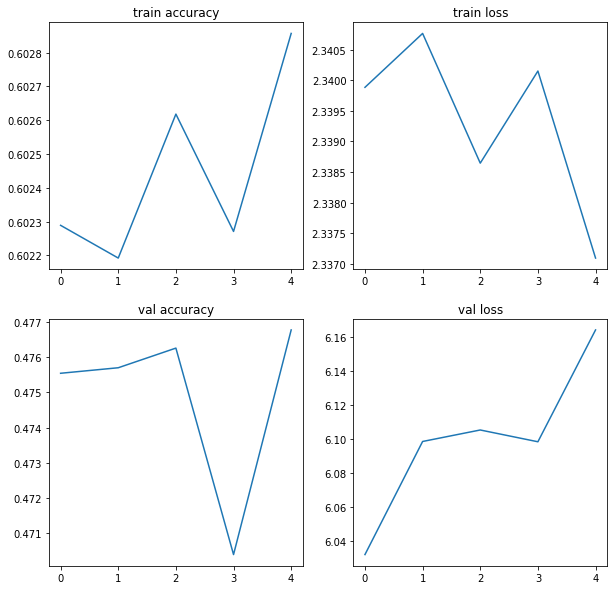

In [ ]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(2,2)
fig.set_size_inches(10,10)
axis[0,0].plot(history.history['accuracy'])
axis[0,0].set_title('train accuracy')
axis[0,1].plot(history.history['loss'])
axis[0,1].set_title('train loss')
axis[1,0].plot(history.history['val_accuracy'])
axis[1,0].set_title('val accuracy')
axis[1,1].plot(history.history['val_loss'])
axis[1,1].set_title('val loss')
plt.show()

In [ ]:
#save model
model.save('/content/drive/MyDrive/Colab Notebooks/NMT/nmt.h5')

In [ ]:
#getting output of intermediate layers
# inter_layer = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)
# int_out = inter_layer(padded_eng[0])
# int_out[0]

In [ ]:
p = model.predict([padded_eng[5].reshape(1,padded_eng.shape[1]), padded_hin_in[5].reshape(1,padded_hin_in.shape[1])])

In [ ]:
p.shape, p[0][0].shape,  p[0][0], np.argmax(p[0][0]), padded_hin_out[5][0]

((1, 16, 40225),
 (40225,),
 array([1.6420777e-14, 2.0042288e-38, 4.7537553e-19, ..., 3.4412759e-18,
        3.5853482e-18, 3.3912263e-18], dtype=float32),
 18646,
 28581)

In [ ]:
# import numpy as np
# tokenizer_hin.sequences_to_texts([np.argmax(p[0], axis=1)])

In [ ]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model.png', show_shapes=True, show_dtype=True, show_layer_names=True)

**Inference** -------------------------------------------------------------------------------------

In [ ]:
#encoder inference model
from tensorflow.keras.models import load_model
model_load = load_model('/content/drive/MyDrive/Colab Notebooks/NMT/nmt.h5')

In [ ]:
#model_load.summary()

In [ ]:
model_load.layers

Encoder Inference Model

In [76]:
inf_enc_model = Model(inputs=model_load.layers[0].output, outputs=model_load.layers[4].output)
ip, ip_h, ip_c = inf_enc_model.predict(padded_eng[0].reshape(1,padded_eng.shape[1]))
inf_enc_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
eng_inp_tensor (InputLayer)  [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 128)         4346496   
_________________________________________________________________
lstm_2 (LSTM)                [(None, 64), (None, 64),  49408     
Total params: 4,395,904
Trainable params: 4,395,904
Non-trainable params: 0
_________________________________________________________________


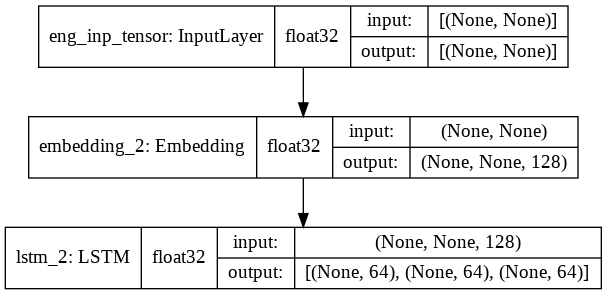

In [77]:
plot_model(inf_enc_model, to_file='encoder_model.png', show_shapes=True, show_dtype=True, show_layer_names=True,)

In [ ]:
#_, eh, ec = inf_enc_model.predict(padded_eng[0].reshape(1,padded_eng.shape[1]))

In [ ]:
#padded_eng.shape, padded_eng[0].shape, padded_eng[0].reshape(1,padded_eng.shape[1]).shape

In [ ]:
#eh.shape, ec.shape

Decoder Inference Model

In [ ]:
#decoder inference model
dec_input_state_h = Input(shape=(None,))
dec_input_state_c = Input(shape=(None,))
dec_inputs_states = [dec_input_state_h, dec_input_state_c]
dec_out, dec_h, dec_c = model_load.layers[5](model_load.layers[3].output, initial_state=dec_inputs_states)

dec_output = model_load.layers[6](dec_out)

dec_model_final = Model(inputs=[model_load.layers[1].output, dec_inputs_states], outputs=[dec_output, [dec_h, dec_c]])

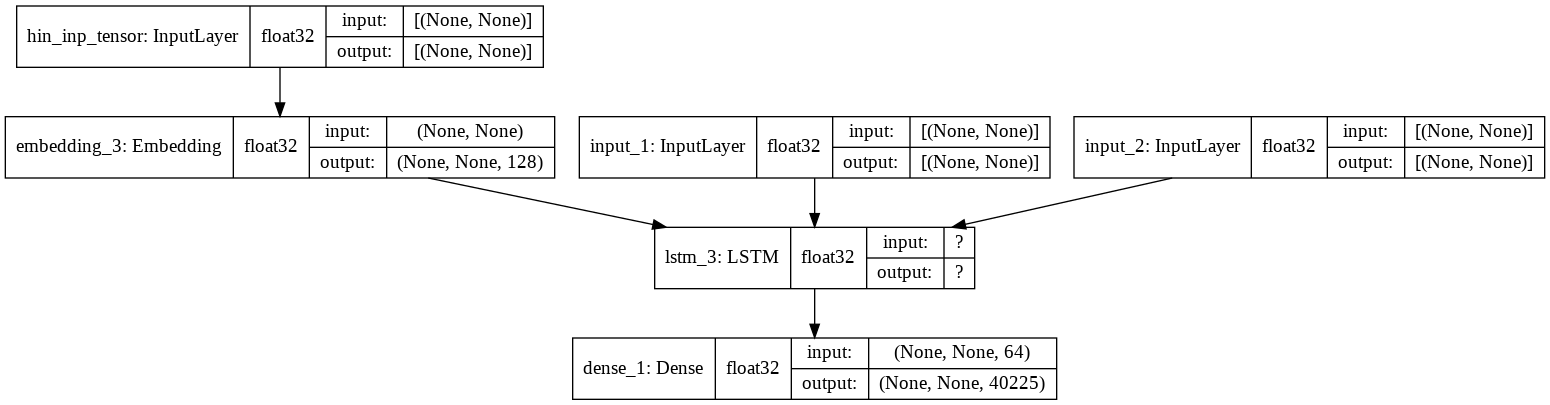

In [78]:
plot_model(dec_model_final, to_file='decoder_model.png', show_shapes=True, show_dtype=True, show_layer_names=True,)

In [ ]:
def translate(eng_sent):
  _, eh, ec = inf_enc_model.predict(eng_sent.reshape(1, len(eng_sent)))
  translated = []
  dec_inp_seq = np.array([2]).reshape(1,1) #2 for start and 1 for end
  stop = False
  while not stop:
    d, [eh, ec] = dec_model_final.predict([dec_inp_seq, [eh, ec]])
    dec_inp_seq[:,] = np.argmax(d[0][0])
    translated.append(np.argmax(d[0][0]))

    if dec_inp_seq[0][0] == 1 or len(translated)>16:
      stop = True
  return translated

In [ ]:
l = translate(padded_eng[5])
print('actual eng text : ', tokenizer_eng.sequences_to_texts([padded_eng[5]]))
print('actual hindi text : ', tokenizer_hin.sequences_to_texts([padded_hin[5]]))
print()
print('translated hindi text : ', tokenizer_hin.sequences_to_texts([l[:-1]])) #last one is end so tranucated

actual eng text :  ['the holy dip is on november']
actual hindi text :  ['मुख्य स्नान नवंबर को है']

translated hindi text :  ['नवंबर को अंतिम रूप से ये संशोधित श्रृंखला शुरू होती है।']


In [ ]:
def custom_trans(sent):
  seq = tokenizer_eng.texts_to_sequences(sent)
  padded_seq = pad_sequences(seq, padding='post', maxlen=max(eng_sent_len))
  hin_out = translate(padded_seq[0])
  print('the eng sent is : ', sent)
  print('the translated hin sent is :', tokenizer_hin.sequences_to_texts([hin_out[:-1]]))

In [ ]:
custom_trans(['dwarka is also a dhaam among the chaar dhaams'])

the eng sent is :  ['dwarka is also a dhaam among the chaar dhaams']
the translated hin sent is : ['द्वारका में ये गांव को मूल्य उपलब्ध होगा।']
